In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
annotations = pd.read_csv("annotation/GRCh38SEQ.csv", sep='\t')

annotations = annotations.sort_values(by=['chrom', 'chromStart'])

In [3]:
annotations['length'] = annotations['chromEnd'] - annotations['chromStart']
annotations

,chrom,chromStart,chromEnd,name,ucscLabel,length
0,chr1,181251,181601,EH38E1310153,enhP,350
1,chr1,190865,191071,EH38E1310154,enhD,206
2,chr1,778562,778912,EH38E1310158,prom,350
3,chr1,779086,779355,EH38E1310159,prom,269
4,chr1,779727,780060,EH38E1310160,enhP,333
...,...,...,...,...,...,...
926530,chrY,56842374,56842545,EH38E2776491,enhD,171
926531,chrY,56844431,56844674,EH38E2776496,enhD,243
926532,chrY,56857410,56857680,EH38E2776512,CTCF,270
926533,chrY,56857917,56858119,EH38E2776513,CTCF,202


In [4]:
annotations.describe()

,chromStart,chromEnd,length
count,9.265350e+05,9.265350e+05,926535.000000
mean,7.907813e+07,7.907840e+07,273.407233
std,5.667270e+07,5.667270e+07,67.258808
min,1.000100e+04,1.021700e+04,150.000000
25%,3.351238e+07,3.351264e+07,209.000000
50%,6.860000e+07,6.860020e+07,287.000000
75%,1.160279e+08,1.160282e+08,341.000000
max,2.489269e+08,2.489272e+08,350.000000


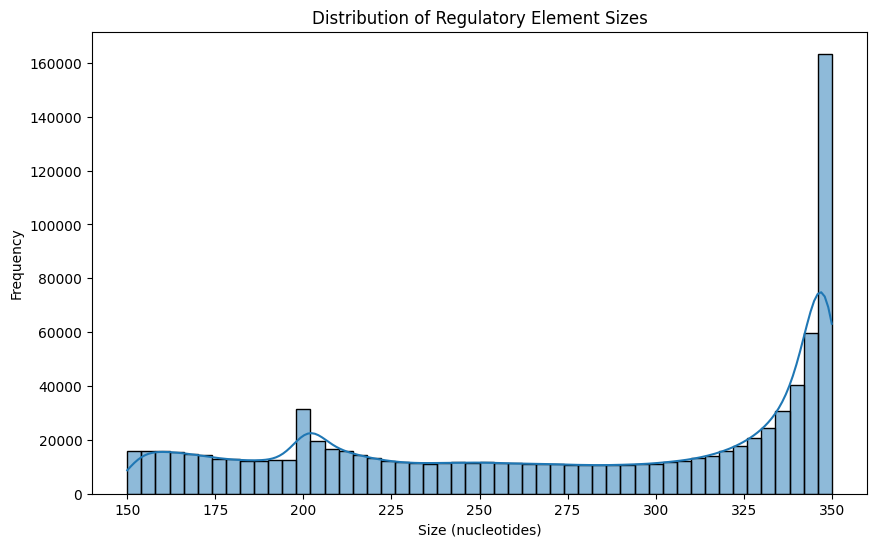

In [5]:
# Create a distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(annotations['length'], bins=50, kde=True)
plt.title('Distribution of Regulatory Element Sizes')
plt.xlabel('Size (nucleotides)')
plt.ylabel('Frequency')
plt.show()

In [6]:
annotations['gap_to_next'] = annotations.groupby('chrom')['chromStart'].shift(-1) - annotations['chromEnd']

In [7]:
# Calculate gaps to the previous element within each chromosome
annotations['gap_to_previous'] = annotations['chromStart'] - annotations.groupby('chrom')['chromEnd'].shift(1)

In [8]:
# Fill NaN values for gap_to_next and gap_to_previous
annotations.loc[annotations['gap_to_next'].isna(), 'gap_to_next'] = 250
annotations.loc[annotations['gap_to_previous'].isna(), 'gap_to_previous'] = 250
annotations[annotations['chrom']=='chr9']

,chrom,chromStart,chromEnd,name,ucscLabel,length,gap_to_next,gap_to_previous
863907,chr9,10745,11005,EH38E2676761,K4m3,260,62475.0,250.0
863908,chr9,73480,73830,EH38E2676765,enhP,350,38717.0,62475.0
863909,chr9,112547,112785,EH38E2676768,enhP,238,135.0,38717.0
863910,chr9,112920,113195,EH38E2676769,enhP,275,353.0,135.0
863911,chr9,113548,113772,EH38E2676770,prom,224,13.0,353.0
...,...,...,...,...,...,...,...,...
902851,chr9,138147644,138147820,EH38E2738468,K4m3,176,2362.0,14015.0
902852,chr9,138150182,138150426,EH38E2738469,enhP,244,20.0,2362.0
902853,chr9,138150446,138150654,EH38E2738470,enhP,208,52756.0,20.0
902854,chr9,138203410,138203718,EH38E2738472,CTCF,308,8181.0,52756.0


In [9]:
annotations.describe()

,chromStart,chromEnd,length,gap_to_next,gap_to_previous
count,9.265350e+05,9.265350e+05,926535.000000,9.265350e+05,9.265350e+05
mean,7.907813e+07,7.907840e+07,273.407233,2.982492e+03,2.982492e+03
std,5.667270e+07,5.667270e+07,67.258808,4.601081e+04,4.601081e+04
min,1.000100e+04,1.021700e+04,150.000000,0.000000e+00,0.000000e+00
25%,3.351238e+07,3.351264e+07,209.000000,1.290000e+02,1.290000e+02
50%,6.860000e+07,6.860020e+07,287.000000,6.900000e+02,6.900000e+02
75%,1.160279e+08,1.160282e+08,341.000000,2.870000e+03,2.870000e+03
max,2.489269e+08,2.489272e+08,350.000000,3.026833e+07,3.026833e+07


In [10]:
annotations[(annotations['gap_to_next'] == 0) | (annotations['gap_to_previous'] == 0)]


,chrom,chromStart,chromEnd,name,ucscLabel,length,gap_to_next,gap_to_previous
373,chr1,1272308,1272492,EH38E1310700,enhP,184,0.0,1128.0
374,chr1,1272492,1272841,EH38E1310701,enhP,349,125.0,0.0
524,chr1,1421631,1421833,EH38E1310894,prom,202,0.0,62.0
525,chr1,1421833,1422069,EH38E1310895,prom,236,444.0,0.0
892,chr1,2018594,2018813,EH38E1311400,K4m3,219,0.0,3218.0
...,...,...,...,...,...,...,...,...
925475,chrX,155632836,155633046,EH38E2774668,enhD,210,46716.0,0.0
925558,chrY,2934942,2935290,EH38E2774810,prom,348,0.0,169.0
925559,chrY,2935290,2935469,EH38E2774811,prom,179,15.0,0.0
925995,chrY,12661554,12661721,EH38E2775574,enhP,167,0.0,9585.0


In [11]:
annotations[annotations['gap_to_next']+annotations['length']+annotations['gap_to_previous']<350]

,chrom,chromStart,chromEnd,name,ucscLabel,length,gap_to_next,gap_to_previous
71,chr1,940604,940812,EH38E1310273,enhD,208,37.0,12.0
72,chr1,940849,941067,EH38E1310274,enhD,218,53.0,37.0
73,chr1,941120,941307,EH38E1310275,enhD,187,41.0,53.0
74,chr1,941348,941558,EH38E1310276,enhD,210,20.0,41.0
81,chr1,943896,944137,EH38E1310283,enhD,241,35.0,38.0
...,...,...,...,...,...,...,...,...
926148,chrY,14524688,14524863,EH38E2775817,enhD,175,85.0,44.0
926169,chrY,14834458,14834616,EH38E2775858,enhD,158,23.0,17.0
926379,chrY,19744402,19744562,EH38E2776198,enhP,160,69.0,1.0
926381,chrY,19745112,19745287,EH38E2776200,enhP,175,16.0,132.0


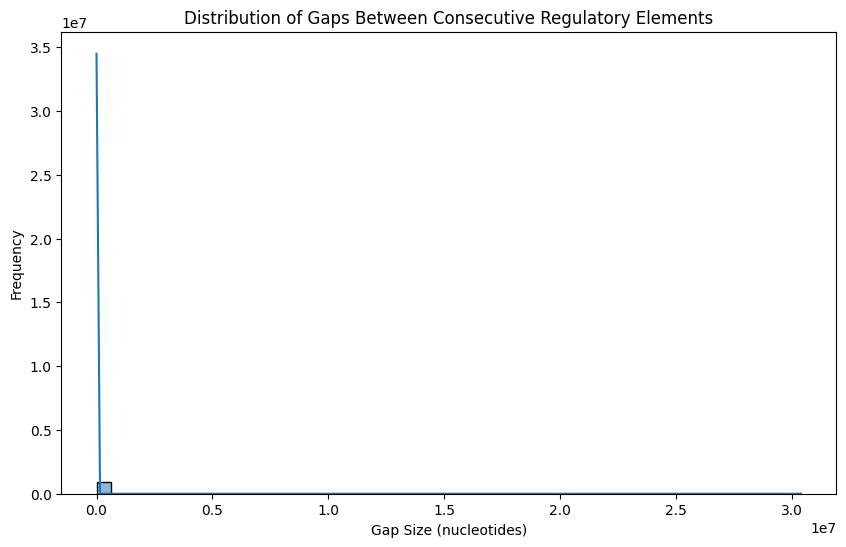

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(annotations['gap_to_next']+annotations['length']+annotations['gap_to_previous'], bins=50, kde=True)  # dropna() to remove the last NaN value
plt.title('Distribution of Gaps Between Consecutive Regulatory Elements')
plt.xlabel('Gap Size (nucleotides)')
plt.ylabel('Frequency')
plt.show()

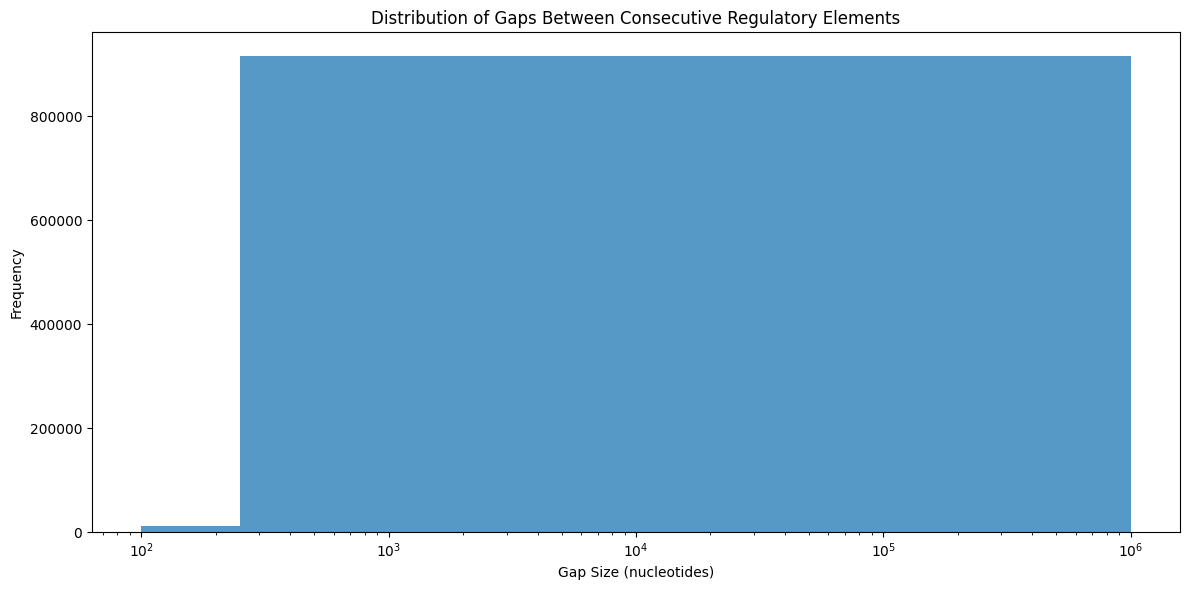

In [13]:
# Define custom bin edges without using np.inf
bins = [0, 100, 250, 1e6]


plt.figure(figsize=(12, 6))
sns.histplot(annotations['gap_to_next']+annotations['length']+annotations['gap_to_previous'], bins=bins)
plt.title('Distribution of Gaps Between Consecutive Regulatory Elements')
plt.xlabel('Gap Size (nucleotides)')
plt.ylabel('Frequency')
plt.xscale('log')
plt.tight_layout()
plt.show()


In [14]:
import random
def computeFixedFrameStart (row):
    total_len = row['gap_to_previous']+row['length']+row['gap_to_next']
    if total_len<=400:
        return row['chromStart']-row['gap_to_previous']
    else:
        low_bound = max(row['chromStart']-row['gap_to_previous'], row['chromEnd'] - 400)
        up_bound = min(row['chromStart'], row['chromEnd'] + row['gap_to_next'] - 400)
        return random.randint(int(low_bound), int(up_bound))

# Apply the function to each row in the dataframe
annotations['frameStart'] = annotations.apply(computeFixedFrameStart, axis=1)

# Calculate frameEnd based on frameStart
annotations['frameEnd'] = annotations['frameStart'] + 400

annotations



,chrom,chromStart,chromEnd,name,ucscLabel,length,gap_to_next,gap_to_previous,frameStart,frameEnd
0,chr1,181251,181601,EH38E1310153,enhP,350,9264.0,250.0,181213.0,181613.0
1,chr1,190865,191071,EH38E1310154,enhD,206,587491.0,9264.0,190750.0,191150.0
2,chr1,778562,778912,EH38E1310158,prom,350,174.0,587491.0,778551.0,778951.0
3,chr1,779086,779355,EH38E1310159,prom,269,372.0,174.0,778956.0,779356.0
4,chr1,779727,780060,EH38E1310160,enhP,333,10337.0,372.0,779670.0,780070.0
...,...,...,...,...,...,...,...,...,...,...
926530,chrY,56842374,56842545,EH38E2776491,enhD,171,1886.0,3026.0,56842270.0,56842670.0
926531,chrY,56844431,56844674,EH38E2776496,enhD,243,12736.0,1886.0,56844322.0,56844722.0
926532,chrY,56857410,56857680,EH38E2776512,CTCF,270,237.0,12736.0,56857381.0,56857781.0
926533,chrY,56857917,56858119,EH38E2776513,CTCF,202,10064.0,237.0,56857794.0,56858194.0


In [15]:
# Select only numeric columns for checking negative values
numeric_cols = annotations.select_dtypes(include=[np.number])

# Check for any negative values in the numeric columns and display the rows with negative values
negative_values = annotations[(numeric_cols < 0).any(axis=1)]
print(negative_values)

Empty DataFrame
Columns: [chrom, chromStart, chromEnd, name, ucscLabel, length, gap_to_next, gap_to_previous, frameStart, frameEnd]
Index: []


In [16]:
annotations = annotations.sort_values(by=['chrom', 'chromStart'])


annotations['next_frameStart'] = annotations.groupby('chrom')['frameStart'].shift(-1)
annotations['gap_to_next_frame'] = annotations['next_frameStart'] - annotations['frameEnd']

eligible_gaps = annotations[annotations['gap_to_next_frame'] >= 400]


In [17]:
eligible_gaps[eligible_gaps['frameEnd']>=eligible_gaps['next_frameStart']]

,chrom,chromStart,chromEnd,name,ucscLabel,length,gap_to_next,gap_to_previous,frameStart,frameEnd,next_frameStart,gap_to_next_frame


In [18]:
def get_junk_frame_start(row):
    if pd.isna(row['next_frameStart']):
        return None
    return random.randint(int(row['frameEnd']), int(row['next_frameStart'] - 400))

eligible_gaps['junk_frameStart'] = eligible_gaps.apply(get_junk_frame_start, axis=1)
eligible_gaps = eligible_gaps.dropna(subset=['junk_frameStart'])
eligible_gaps['junk_frameEnd'] = eligible_gaps['junk_frameStart'] + 400

junk_sequences = eligible_gaps[['chrom', 'junk_frameStart', 'junk_frameEnd']].copy()
junk_sequences.rename(columns={'junk_frameStart': 'frameStart', 'junk_frameEnd': 'frameEnd'}, inplace=True)

junk_sequences['ucscLabel'] = 'junk'

combined_annotations = pd.concat([annotations[['chrom', 'frameStart', 'frameEnd', 'ucscLabel']], junk_sequences])
combined_annotations.rename(columns={'ucscLabel': 'label'}, inplace=True)

combined_annotations = combined_annotations.sort_values(by=['chrom', 'frameEnd'])
combined_annotations.reset_index(drop=True, inplace=True)
combined_annotations


/tmp/ipykernel_19598/2952367093.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eligible_gaps['junk_frameStart'] = eligible_gaps.apply(get_junk_frame_start, axis=1)


,chrom,frameStart,frameEnd,label
0,chr1,181213.0,181613.0,enhP
1,chr1,185946.0,186346.0,junk
2,chr1,190750.0,191150.0,enhD
3,chr1,214842.0,215242.0,junk
4,chr1,778551.0,778951.0,prom
...,...,...,...,...
1424205,chrY,56848635.0,56849035.0,junk
1424206,chrY,56857381.0,56857781.0,CTCF
1424207,chrY,56857794.0,56858194.0,CTCF
1424208,chrY,56863337.0,56863737.0,junk


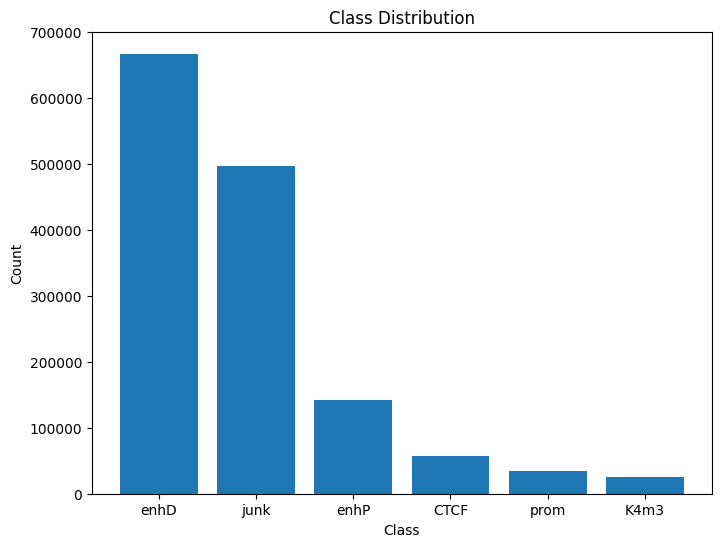

In [19]:
class_counts = combined_annotations['label'].value_counts()

# Plot the class distribution after undersampling
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [20]:
class_counts

enhD    667599
junk    497675
enhP    141830
CTCF     56766
prom     34803
K4m3     25537
Name: label, dtype: int64

In [21]:
combined_annotations

,chrom,frameStart,frameEnd,label
0,chr1,181213.0,181613.0,enhP
1,chr1,185946.0,186346.0,junk
2,chr1,190750.0,191150.0,enhD
3,chr1,214842.0,215242.0,junk
4,chr1,778551.0,778951.0,prom
...,...,...,...,...
1424205,chrY,56848635.0,56849035.0,junk
1424206,chrY,56857381.0,56857781.0,CTCF
1424207,chrY,56857794.0,56858194.0,CTCF
1424208,chrY,56863337.0,56863737.0,junk


In [22]:
# combined_annotations['frameStart'] = combined_annotations['frameStart'].astype(int)
# combined_annotations['frameEnd'] = combined_annotations['frameEnd'].astype(int)

# combined_annotations.to_csv('combined_annotations.csv', sep='\t', index=False)